<a href="https://colab.research.google.com/github/KEETHAVANI/STROKE-PREDICTION-IN-ML/blob/main/stroke_pred_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data_df = pd.read_csv('/content/drive/MyDrive/healthcare-dataset-stroke-data (2).csv')


In [5]:
data_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [6]:
data_df.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [7]:
data_df.shape


(5110, 12)

In [8]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [9]:
data_df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [10]:
data_df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

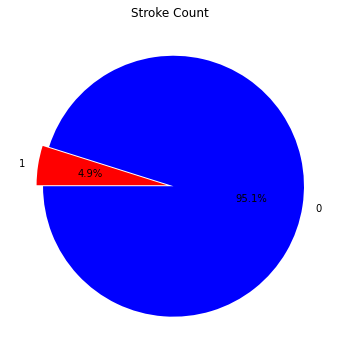

In [11]:
plt.figure(figsize=(12,6))
plt.title("Stroke Count")
g = plt.pie(data_df.stroke.value_counts(),explode=(0.025,0.025), labels=data_df.stroke.value_counts().index, colors=['blue', 'red'],autopct='%1.1f%%', startangle=180)
plt.show()


In [12]:
data_df['work_type'].value_counts()


Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [13]:
# Drop the id column
data_df.drop(columns=['id'], inplace=True)


In [14]:
# Showing records where patient suffered from stroke but had missing value in bmi attribute.
data_df[data_df['bmi'].isna() & data_df['stroke'] == 1]


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,Female,61.00,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,Female,59.00,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,Male,78.00,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,Male,57.00,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,Male,58.00,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
29,Male,59.00,0,0,Yes,Private,Rural,211.78,NaN,formerly smoked,1
43,Female,63.00,0,0,Yes,Private,Urban,90.90,NaN,formerly smoked,1
46,Female,75.00,0,1,No,Self-employed,Urban,109.78,NaN,Unknown,1
50,Female,76.00,0,0,No,Private,Urban,89.96,NaN,Unknown,1
51,Male,78.00,1,0,Yes,Private,Urban,75.32,NaN,formerly smoked,1


In [15]:
# Replace the missing values with mean of bmi attribute
data_df['bmi'].fillna(np.round(data_df['bmi'].mean(), 1), inplace = True)


In [16]:
# Create a new column for normalized age
data_df['age_norm']=(data_df['age']-data_df['age'].min())/(data_df['age'].max()-data_df['age'].min())


In [17]:
# Create a new column for normalized bmi
data_df['bmi_norm']=(data_df['bmi']-data_df['bmi'].min())/(data_df['bmi'].max()-data_df['bmi'].min())

In [18]:
# Create a new column for normalized avg glucose level
data_df['avg_glucose_level_norm']=(data_df['avg_glucose_level']-data_df['avg_glucose_level'].min())/(data_df['avg_glucose_level'].max()-data_df['avg_glucose_level'].min())


In [19]:
# Male=>1, Female=>0, Other=>2
data_df['gender'].replace(['Male', 'Female', 'Other'], [1, 0, 2],inplace = True)
# Urban=>1, Rural=>0
data_df['Residence_type'].replace(['Urban', 'Rural'], [1, 0], inplace = True)
# never smoked=>0, formerly smoked=>1, Unknown=>2, smokes=>3
data_df['smoking_status'].replace(['never smoked', 'formerly smoked', 'Unknown', 'smokes'], [0, 1, 2, 3], inplace = True)
# Yes=>1, No=>0
data_df['ever_married'].replace(['Yes', 'No'], [1, 0],inplace = True)
# Never_worked=>0, Self-employed=>1, children=>2, Govt_job=>3, Private=>4
data_df['work_type'].replace(['Never_worked', 'Self-employed', 'children', 'Govt_job', 'Private'], [0, 1, 2, 3, 4], inplace = True)

In [20]:
data_df.drop(['age', 'avg_glucose_level', 'bmi'], axis=1, inplace=True)


In [21]:
data_df.head()

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,stroke,age_norm,bmi_norm,avg_glucose_level_norm
0,1,0,1,1,4,1,1,1,0.816895,0.301260,0.801265
1,0,0,0,1,1,0,0,1,0.743652,0.213058,0.679023
2,1,0,1,1,4,0,0,1,0.975586,0.254296,0.234512
3,0,0,0,1,4,1,3,1,0.597168,0.276060,0.536008
4,0,1,0,1,1,0,0,1,0.963379,0.156930,0.549349


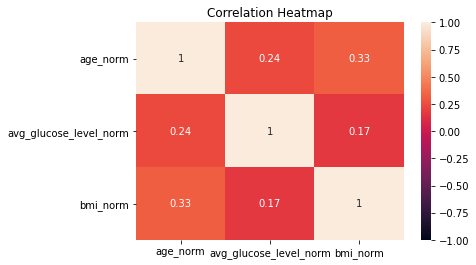

In [22]:
# Create the correlation heatmap
heatmap = sns.heatmap(data_df[['age_norm', 'avg_glucose_level_norm', 'bmi_norm']].corr(), vmin=-1, vmax=1, annot=True)
# Create the title
heatmap.set_title('Correlation Heatmap');


In [23]:
def get_stacked_bar_chart(column):
    # Get the count of records by column and stroke    
    df_pct = data_df.groupby([column, 'stroke'])['age_norm'].count()
    # Create proper DataFrame's format
    df_pct = df_pct.unstack()    
    return df_pct.plot.bar(stacked=True, figsize=(6,6), width=1);


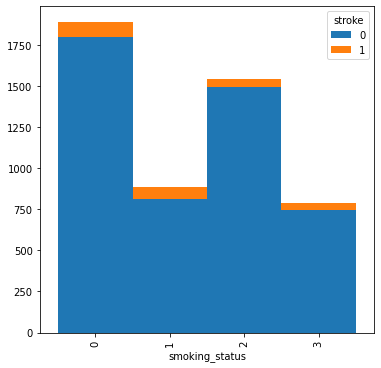

In [24]:
get_stacked_bar_chart('smoking_status')


In [25]:
x_train = data_df.drop('stroke',axis=1)
y_train = data_df['stroke']


In [26]:
X_train, X_val, Y_train, Y_val = train_test_split(x_train,y_train, test_size= 0.2, random_state= 5)


In [27]:
X_train.shape, Y_train.shape, X_val.shape, Y_val.shape

((4088, 10), (4088,), (1022, 10), (1022,))

In [28]:
models = [LogisticRegression(),RandomForestClassifier(),
          DecisionTreeClassifier(), KNeighborsClassifier(),
         GaussianNB(),SVC()]

In [29]:
scores = []
labels = []

In [30]:
for x in models:
    m =x
    m.fit(X_train,Y_train)
    predict =x.predict(X_val)
    score=m.score(X_val,Y_val)
    scores.append(score)
    labels.append(x.__class__.__name__)

In [31]:
result={'Model':labels,'Accuracy':scores}
frame=pd.DataFrame(result)
frame.sort_values(by ='Accuracy', ascending = False)

,Model,Accuracy
0,LogisticRegression,0.949119
5,SVC,0.949119
3,KNeighborsClassifier,0.948141
1,RandomForestClassifier,0.947162
2,DecisionTreeClassifier,0.908023
4,GaussianNB,0.869863
